In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/jhonatan/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
bonf_pval    = pd.read_csv('../data/BONF_PVAL_GEM2NET_UNIQLINK', 
                           sep = '\t', index_col=0)
logratio     = pd.read_csv('../data/LOG_RATIO_GEM2NET_UNIQLINK', 
                           sep = '\t', index_col=0)
genes_matrix = pd.read_csv('../data/matricePLM_genes.txt', sep = '\t')

In [3]:
df_pval   = bonf_pval.copy()
df_pval   = bonf_pval.fillna(0)
mask_pval = bonf_pval.map(lambda x: 0 if x>0.05 else 1)

In [4]:
logratio_sig = mask_pval*logratio
logratio_sig = logratio_sig.dropna()
logratio_sig.shape

(17219, 387)

In [6]:
logratio_sig.to_csv('log_ratio_significant.csv')

In [6]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = logratio_sig

kmeans =  KMeans(n_clusters= 5, random_state= 3).fit(X)
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# Overall silhouette score (optional)
silhouette_avg = silhouette_score(X, kmeans.labels_)

for i in range(len(set(kmeans.labels_))):
    # Identify the cluster of interest (e.g., cluster 2)
    cluster_of_interest = i

    # Get indices and silhouette values for this cluster
    cluster_indices = np.where(kmeans.labels_ == cluster_of_interest)[0]
    cluster_silhouette_vals = silhouette_vals[cluster_indices]

    # Analyze
    print(f"Cluster {cluster_of_interest}:")
    print(f"  Number of Points: {len(cluster_silhouette_vals)}")
    print(f"  Average Silhouette Value: {np.mean(cluster_silhouette_vals):.3f}")
    print(f"  Min Silhouette Value: {np.min(cluster_silhouette_vals):.3f}")
    print(f"  Max Silhouette Value: {np.max(cluster_silhouette_vals):.3f}")

Cluster 0:
  Number of Points: 14510
  Average Silhouette Value: 0.570
  Min Silhouette Value: 0.061
  Max Silhouette Value: 0.711
Cluster 1:
  Number of Points: 946
  Average Silhouette Value: -0.119
  Min Silhouette Value: -0.374
  Max Silhouette Value: 0.142
Cluster 2:
  Number of Points: 252
  Average Silhouette Value: -0.002
  Min Silhouette Value: -0.325
  Max Silhouette Value: 0.232
Cluster 3:
  Number of Points: 851
  Average Silhouette Value: -0.169
  Min Silhouette Value: -0.428
  Max Silhouette Value: 0.111
Cluster 4:
  Number of Points: 660
  Average Silhouette Value: -0.137
  Min Silhouette Value: -0.379
  Max Silhouette Value: 0.130


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

clusters = [*range(2,25)]
silhouette_values = []
for i in range(2,25):
    kmeans1 = KMeans(n_clusters= i, random_state=3)
    silhouette = silhouette_score(logratio_sig, kmeans1.fit_predict(logratio_sig))
    silhouette_values.append(silhouette)
    print(f'{i} n_clusters :{silhouette}')

2 n_clusters :0.4491908538916844
3 n_clusters :0.4834403884349844
4 n_clusters :0.479984041642093
5 n_clusters :0.46019735661359795
6 n_clusters :0.3744193012012677
7 n_clusters :0.3680216137531344
8 n_clusters :0.3333767996957338
9 n_clusters :0.3191000933634172
10 n_clusters :0.31898859690613396
11 n_clusters :0.32308583172736965
12 n_clusters :0.27641651491136476
13 n_clusters :0.2618532658883528
14 n_clusters :0.26274115498245304
15 n_clusters :0.2649529441855963
16 n_clusters :0.2621212748623288
17 n_clusters :0.2437530520126012
18 n_clusters :0.24297186892432052
19 n_clusters :0.24851655554648133
20 n_clusters :0.2531053669838323
21 n_clusters :0.2693977967869451
22 n_clusters :0.26774465812770865
23 n_clusters :0.24331344252321715
24 n_clusters :0.24641333929328316


In [ ]:
def silhouettes_kmeans(random_state = 0):
    silhouette_values = []
    for i in range(2,25):
        kmeans1 = KMeans(n_clusters= i, random_state= random_state)
        silhouette = silhouette_score(logratio_sig, kmeans1.fit_predict(logratio_sig))
        silhouette_values.append(silhouette)
    
    return silhouette_values

list2 = silhouettes_kmeans()
list3 = silhouettes_kmeans(random_state = 1)

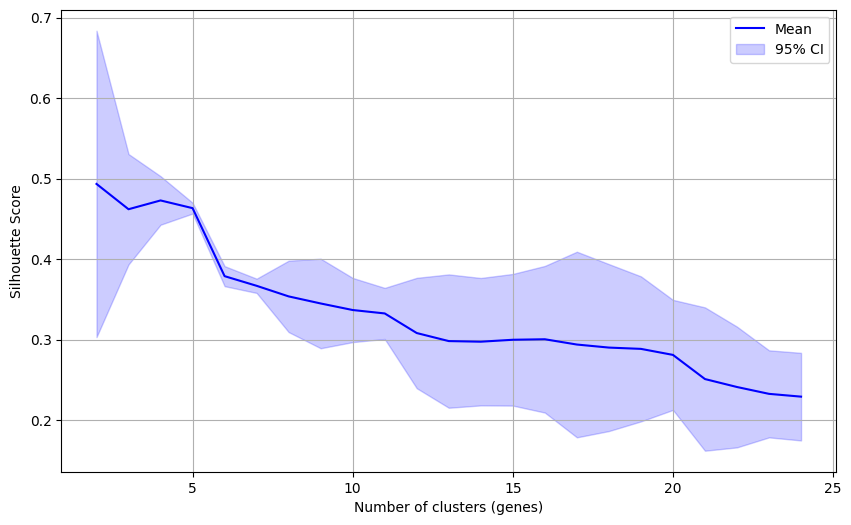

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

data = np.array([silhouette_values, list2, list3])
means = np.mean(data, axis=0)
confidence_intervals = sem(data, axis=0) * t.ppf((1 + 0.95) / 2, df=data.shape[0] - 1)

clusters = [*range(2,25)]

# Plotar a média com intervalo de confiança
plt.figure(figsize=(10, 6))
plt.plot(clusters , means, label='Mean', color='blue')
plt.fill_between(clusters, means - confidence_intervals, means + confidence_intervals, color='blue', alpha=0.2, label='95% CI')
plt.xlabel('Number of clusters (genes)')
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipykernel_541205/1674988161.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


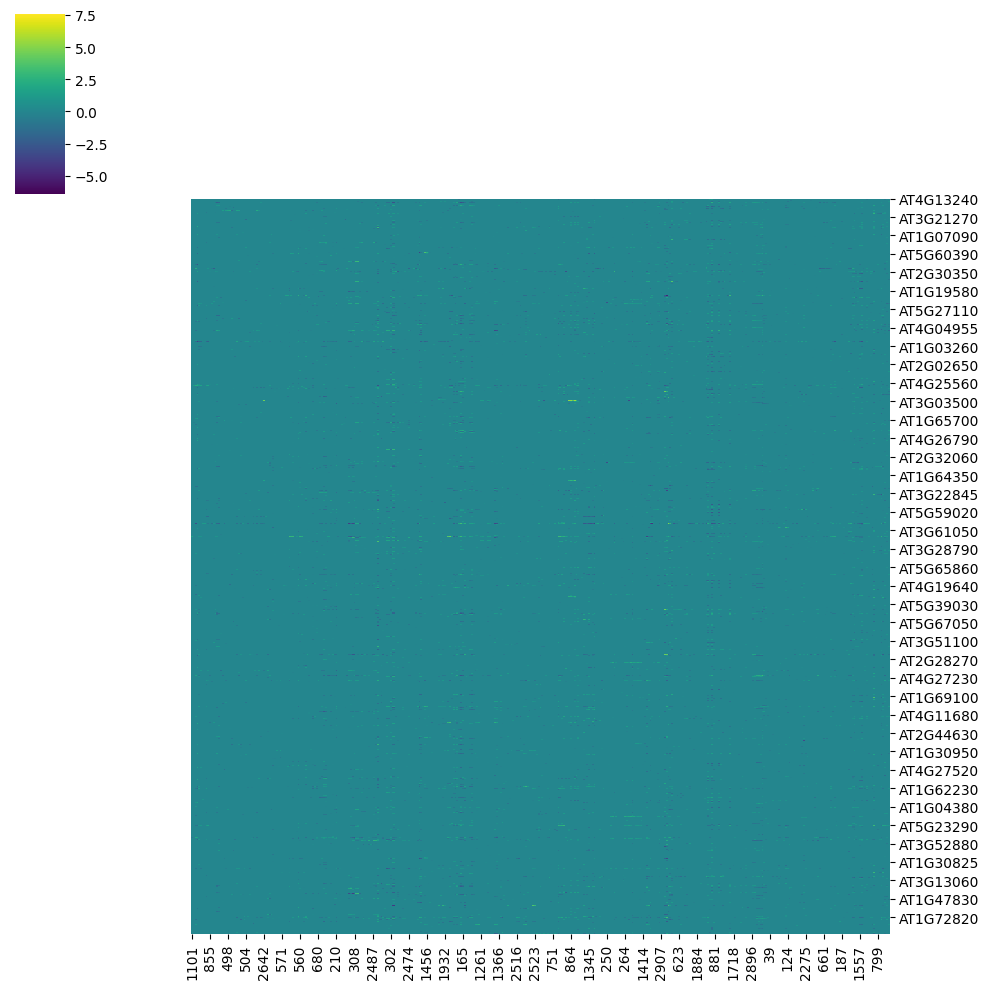

/tmp/ipykernel_541205/1674988161.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


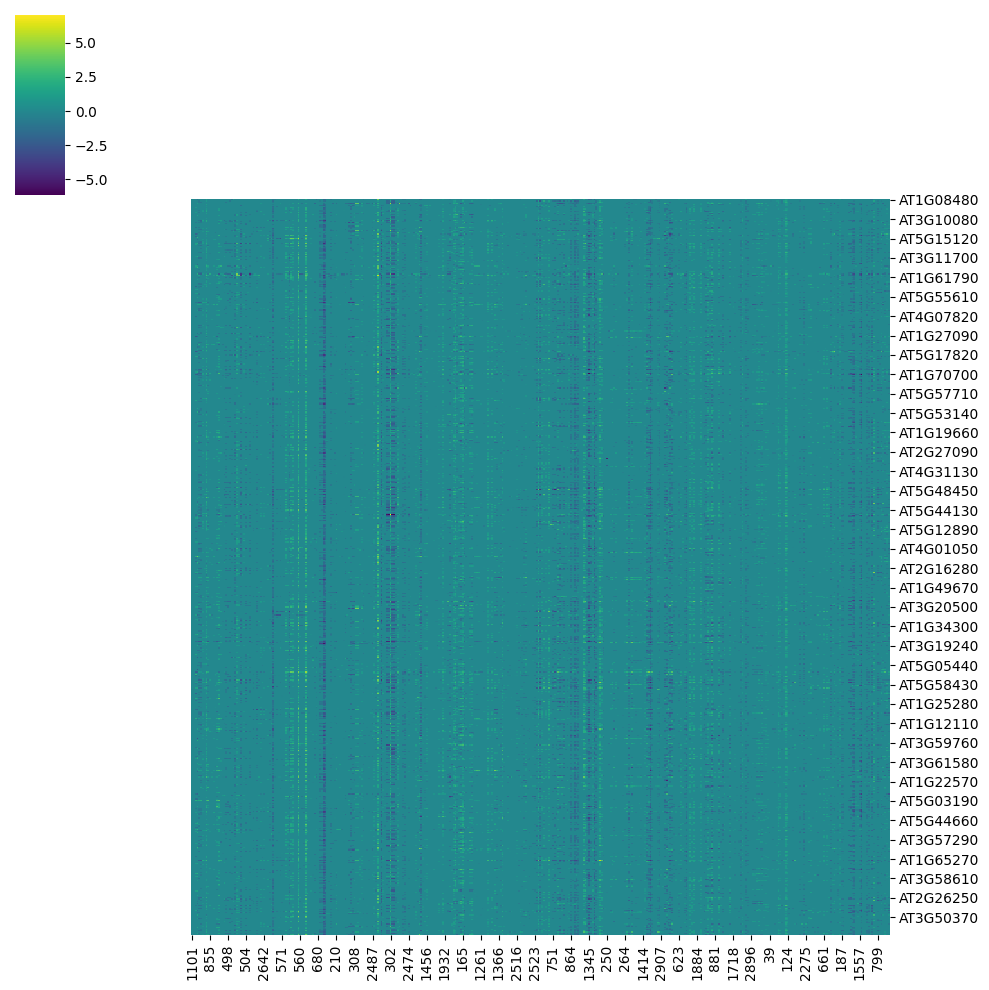

/tmp/ipykernel_541205/1674988161.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


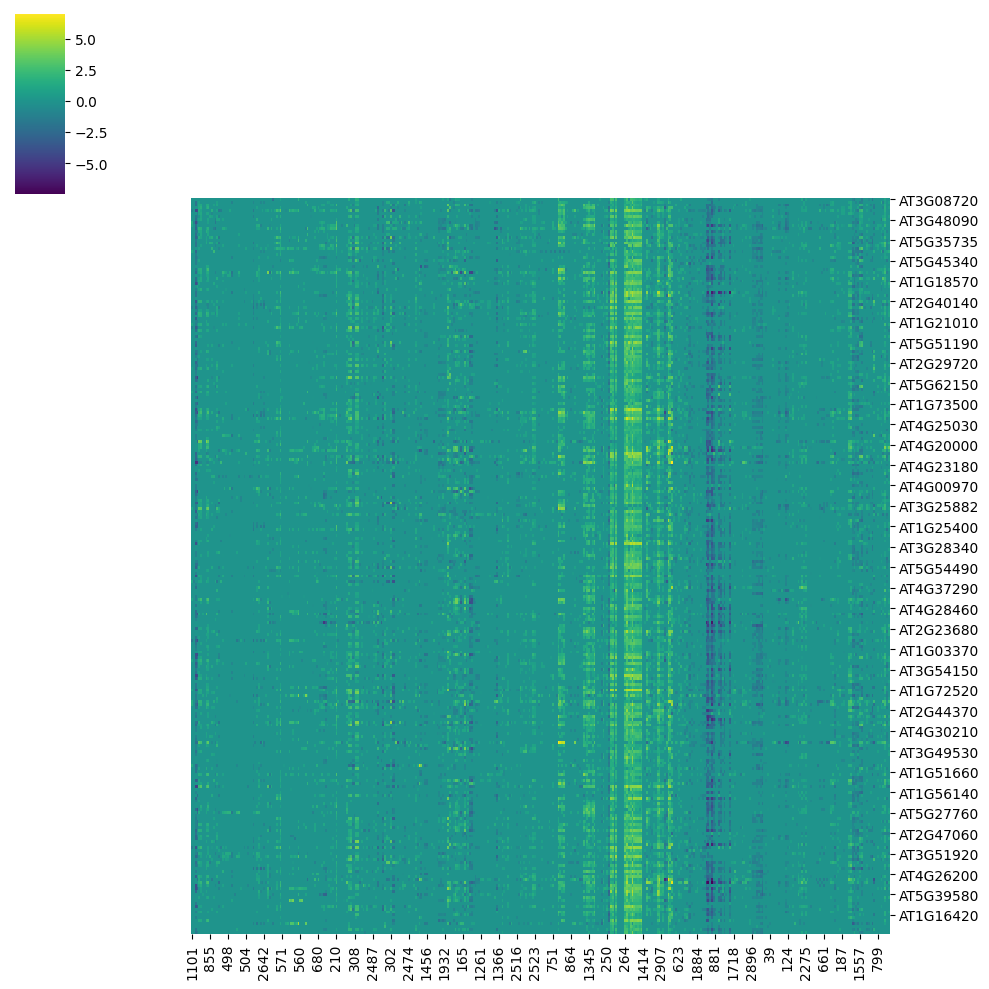

/tmp/ipykernel_541205/1674988161.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


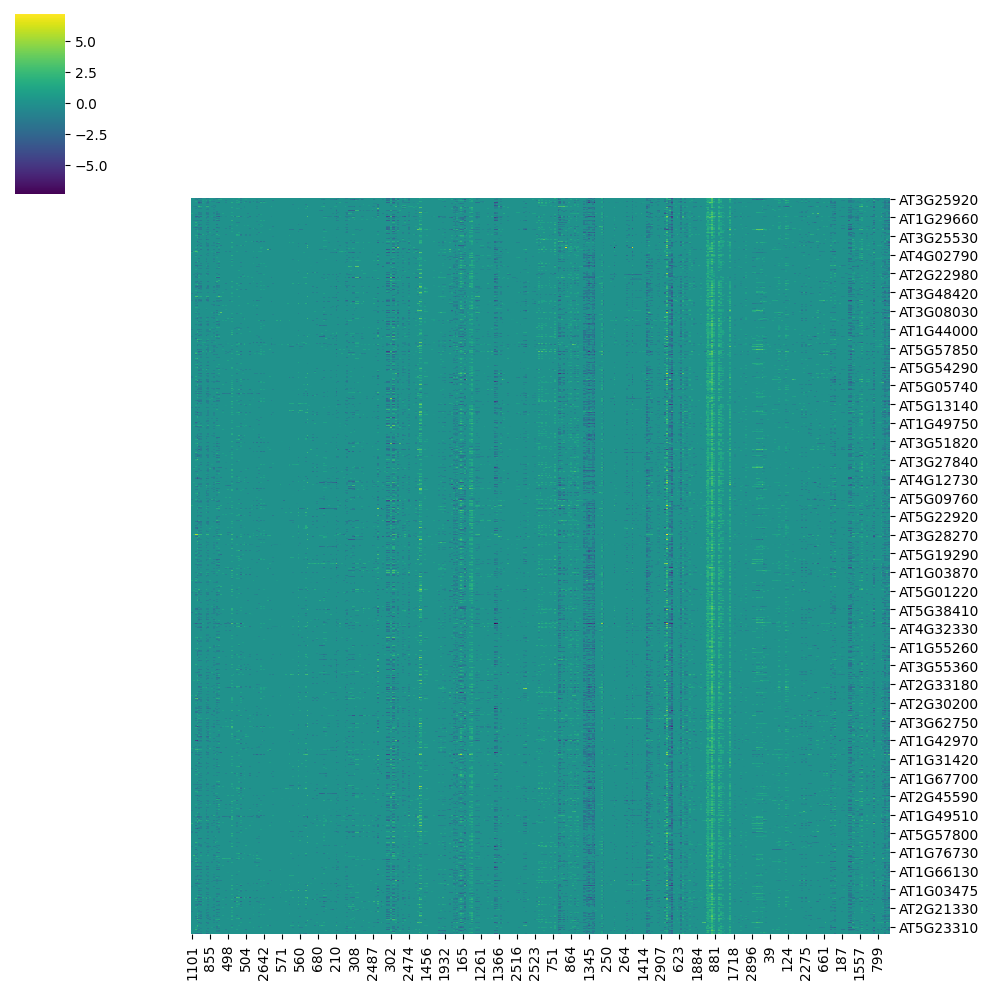

/tmp/ipykernel_541205/1674988161.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


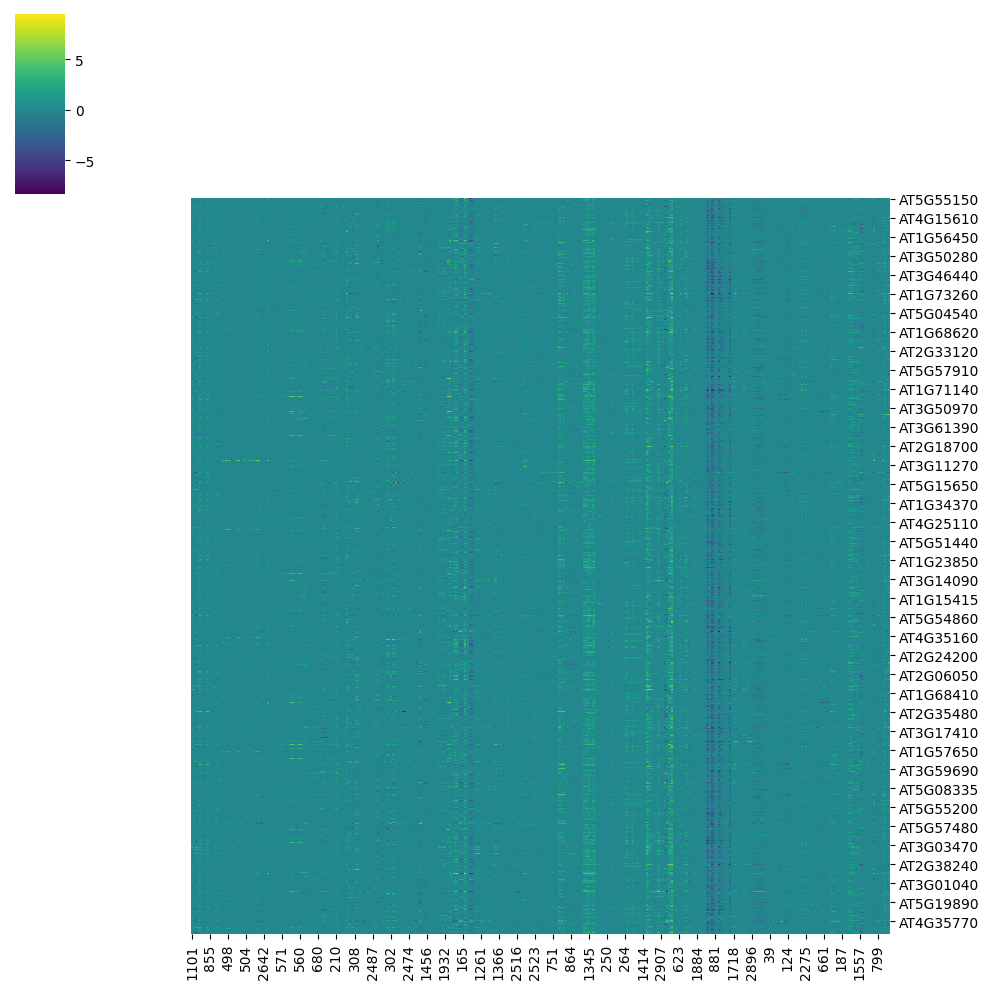

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 2, n_init = 10).fit(logratio_sig)

logratio_labeled = logratio_sig.copy()
logratio_labeled['label'] = kmeans.labels_

for cluster in logratio_labeled['label'].unique():
    sns.clustermap(
        logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'), 
        row_cluster=False,  
        col_cluster=False,
        cmap = 'viridis'
    )

    plt.show()

In [ ]:
def silhouettes_kmeans_stress(random_state = 0):
    silhouette_values = []
    for i in range(2,25):
        kmeans1 = KMeans(n_clusters= i, random_state= random_state)
        silhouette = silhouette_score(logratio_sig.T, kmeans1.fit_predict(logratio_sig.T))
        silhouette_values.append(silhouette)
    
    return silhouette_values

list4 = silhouettes_kmeans_stress(random_state=2)
list5 = silhouettes_kmeans_stress()
list6 = silhouettes_kmeans_stress(random_state = 1)


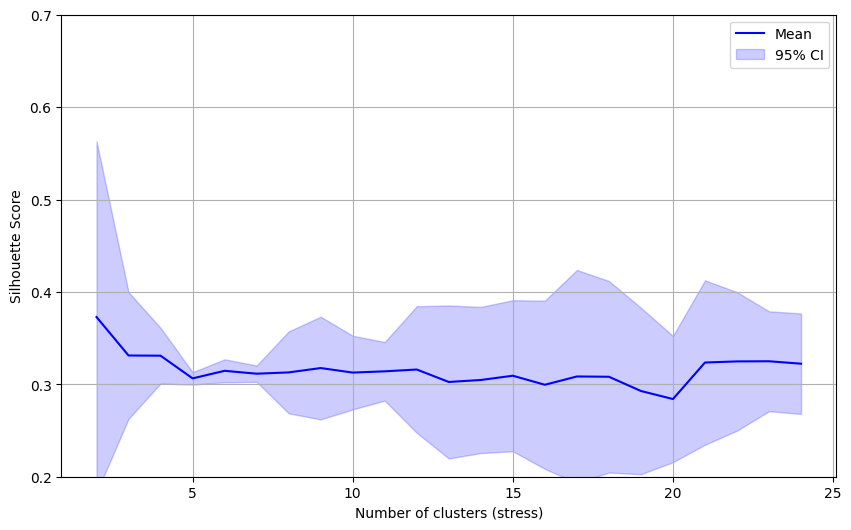

In [28]:
data1 = np.array([list1, list2, list3])
means1 = np.mean(data1, axis=0)
confidence_intervals1 = sem(data, axis=0) * t.ppf((1 + 0.95) / 2, df=data.shape[0] - 1)

cluster = [*range(2,25)]

plt.figure(figsize=(10, 6))
plt.plot(clusters , means1, label='Mean', color='blue')
plt.fill_between(clusters, means1 - confidence_intervals1, means1 + confidence_intervals1, color='blue', alpha=0.2, label='95% CI')
plt.xlabel('Number of clusters (stress)')
plt.ylabel("Silhouette Score")
plt.legend()
plt.ylim(0.2, 0.7)  # Set y-axis limits
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for i in range(2,25):
    kmeans1 = KMeans(n_clusters= i, random_state=3)
    print(f'{i} :{silhouette_score(logratio_sig.T, kmeans1.fit_predict(logratio_sig.T))}')

2 iteration :0.4889778998984496
3 iteration :0.3452406412433123
4 iteration :0.3120190964064309
5 iteration :0.3156122370704204
6 iteration :0.31836393235692634
7 iteration :0.27156706412680126
8 iteration :0.2920735187722069
9 iteration :0.2919236579460315
10 iteration :0.29385341952523053
11 iteration :0.29574342640067647
12 iteration :0.3006309964988234
13 iteration :0.2965691126763837
14 iteration :0.29921277271591445
15 iteration :0.3058364072048257
16 iteration :0.3057184208823483
17 iteration :0.3066814246605291
18 iteration :0.31005877623950845
19 iteration :0.3132993820240369
20 iteration :0.31368983393314853
21 iteration :0.3120427197234773
22 iteration :0.30949704853087295
23 iteration :0.3044776875210446
24 iteration :0.3060138227897887


In [ ]:
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

X = logratio_sig.T

kmeans =  KMeans(n_clusters= 15, random_state= 2).fit(X)
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# Overall silhouette score (optional)
silhouette_avg = silhouette_score(X, kmeans.labels_)

for i in range(len(set(kmeans.labels_))):
    # Identify the cluster of interest (e.g., cluster 2)
    cluster_of_interest = i

    # Get indices and silhouette values for this cluster
    cluster_indices = np.where(kmeans.labels_ == cluster_of_interest)[0]
    cluster_silhouette_vals = silhouette_vals[cluster_indices]

    # Analyze
    print(f"Cluster {cluster_of_interest}:")
    print(f"  Number of Points: {len(cluster_silhouette_vals)}")
    print(f"  Average Silhouette Value: {np.mean(cluster_silhouette_vals):.3f}")
    print(f"  Min Silhouette Value: {np.min(cluster_silhouette_vals):.3f}")
    print(f"  Max Silhouette Value: {np.max(cluster_silhouette_vals):.3f}")


Cluster 0:
  Number of Points: 2
  Average Silhouette Value: 0.334
  Min Silhouette Value: 0.290
  Max Silhouette Value: 0.378
Cluster 1:
  Number of Points: 309
  Average Silhouette Value: 0.426
  Min Silhouette Value: 0.047
  Max Silhouette Value: 0.587
Cluster 2:
  Number of Points: 2
  Average Silhouette Value: 0.601
  Min Silhouette Value: 0.588
  Max Silhouette Value: 0.614
Cluster 3:
  Number of Points: 23
  Average Silhouette Value: 0.059
  Min Silhouette Value: -0.137
  Max Silhouette Value: 0.164
Cluster 4:
  Number of Points: 2
  Average Silhouette Value: 0.366
  Min Silhouette Value: 0.359
  Max Silhouette Value: 0.373
Cluster 5:
  Number of Points: 2
  Average Silhouette Value: 0.233
  Min Silhouette Value: 0.123
  Max Silhouette Value: 0.342
Cluster 6:
  Number of Points: 25
  Average Silhouette Value: -0.180
  Min Silhouette Value: -0.316
  Max Silhouette Value: -0.075
Cluster 7:
  Number of Points: 3
  Average Silhouette Value: 0.122
  Min Silhouette Value: -0.131
  Max

In [36]:
X[kmeans.labels_== 100000].index

Index([], dtype='object')

In [16]:
X.shape

(387, 17219)

In [31]:
from sklearn.metrics import silhouette_samples
from sklearn_extra.cluster import KMedoids

X = logratio_sig.T

kmeans =  KMeans(n_clusters= 7, random_state= 2).fit(X)
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# Overall silhouette score (optional)
silhouette_avg = silhouette_score(X, kmeans.labels_)

for i in range(len(set(kmeans.labels_))):
    # Identify the cluster of interest (e.g., cluster 2)
    cluster_of_interest = i

    # Get indices and silhouette values for this cluster
    cluster_indices = np.where(kmeans.labels_ == cluster_of_interest)[0]
    cluster_silhouette_vals = silhouette_vals[cluster_indices]

    # Analyze
    print(f"Cluster {cluster_of_interest}:")
    print(f"  Number of Points: {len(cluster_silhouette_vals)}")
    print(f"  Average Silhouette Value: {np.mean(cluster_silhouette_vals):.3f}")
    print(f"  Min Silhouette Value: {np.min(cluster_silhouette_vals):.3f}")
    print(f"  Max Silhouette Value: {np.max(cluster_silhouette_vals):.3f}")


Cluster 0:
  Number of Points: 2
  Average Silhouette Value: 0.339
  Min Silhouette Value: 0.296
  Max Silhouette Value: 0.382
Cluster 1:
  Number of Points: 297
  Average Silhouette Value: 0.345
  Min Silhouette Value: 0.057
  Max Silhouette Value: 0.486
Cluster 2:
  Number of Points: 4
  Average Silhouette Value: 0.281
  Min Silhouette Value: 0.130
  Max Silhouette Value: 0.401
Cluster 3:
  Number of Points: 37
  Average Silhouette Value: -0.078
  Min Silhouette Value: -0.188
  Max Silhouette Value: 0.069
Cluster 4:
  Number of Points: 34
  Average Silhouette Value: -0.127
  Min Silhouette Value: -0.291
  Max Silhouette Value: 0.031
Cluster 5:
  Number of Points: 7
  Average Silhouette Value: 0.056
  Min Silhouette Value: -0.127
  Max Silhouette Value: 0.237
Cluster 6:
  Number of Points: 6
  Average Silhouette Value: 0.187
  Min Silhouette Value: 0.041
  Max Silhouette Value: 0.279


In [14]:
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

for i in range(2,25):
    kmeans1 = KMedoids(n_clusters= i, random_state=3)
    print(f'{i} iteration :{silhouette_score(logratio_sig.T, kmeans1.fit_predict(logratio_sig.T))}')

2 iteration :0.12745940028977784
3 iteration :0.11137211982416223
4 iteration :-0.3866555090330638
5 iteration :-0.380848058849527
6 iteration :-0.37565369769339957
7 iteration :-0.3768100658207845
8 iteration :-0.37521729287905164
9 iteration :-0.3737040066855433
10 iteration :-0.3659684681608578
11 iteration :-0.3606697823588831
12 iteration :-0.3411916536229797
13 iteration :-0.3399987781196548
14 iteration :-0.33090489075123447
15 iteration :-0.3297066658600618
16 iteration :-0.3236378454227108
17 iteration :-0.32128522554030386
18 iteration :-0.3166564390503499
19 iteration :-0.31201196904087425
20 iteration :-0.3123196044738638
21 iteration :-0.3120433151007422
22 iteration :-0.30643662624307055
23 iteration :-0.29876924804070387
24 iteration :-0.2980566134909261


In [18]:
from sklearn.metrics import silhouette_samples
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN

X = logratio_sig.T

kmeans =  KMedoids(n_clusters= 15, random_state= 2).fit(X)
silhouette_vals = silhouette_samples(X, kmeans.labels_)

# Overall silhouette score (optional)
silhouette_avg = silhouette_score(X, kmeans.labels_)

for i in range(len(set(kmeans.labels_))):
    # Identify the cluster of interest (e.g., cluster 2)
    cluster_of_interest = i

    # Get indices and silhouette values for this cluster
    cluster_indices = np.where(kmeans.labels_ == cluster_of_interest)[0]
    cluster_silhouette_vals = silhouette_vals[cluster_indices]

    # Analyze
    print(f"Cluster {cluster_of_interest}:")
    print(f"  Number of Points: {len(cluster_silhouette_vals)}")
    print(f"  Average Silhouette Value: {np.mean(cluster_silhouette_vals):.3f}")
    print(f"  Min Silhouette Value: {np.min(cluster_silhouette_vals):.3f}")
    print(f"  Max Silhouette Value: {np.max(cluster_silhouette_vals):.3f}")


Cluster 0:
  Number of Points: 4
  Average Silhouette Value: -0.357
  Min Silhouette Value: -0.783
  Max Silhouette Value: -0.058
Cluster 1:
  Number of Points: 60
  Average Silhouette Value: -0.263
  Min Silhouette Value: -0.852
  Max Silhouette Value: 0.018
Cluster 2:
  Number of Points: 2
  Average Silhouette Value: -0.455
  Min Silhouette Value: -0.913
  Max Silhouette Value: 0.002
Cluster 3:
  Number of Points: 1
  Average Silhouette Value: 0.000
  Min Silhouette Value: 0.000
  Max Silhouette Value: 0.000
Cluster 4:
  Number of Points: 10
  Average Silhouette Value: -0.328
  Min Silhouette Value: -0.831
  Max Silhouette Value: 0.028
Cluster 5:
  Number of Points: 56
  Average Silhouette Value: -0.361
  Min Silhouette Value: -0.825
  Max Silhouette Value: -0.042
Cluster 6:
  Number of Points: 13
  Average Silhouette Value: -0.371
  Min Silhouette Value: -0.857
  Max Silhouette Value: -0.120
Cluster 7:
  Number of Points: 26
  Average Silhouette Value: -0.309
  Min Silhouette Value:

In [36]:
for cluster in logratio_labeled['label'].unique():
    print(f'list of values in the {cluster} cluster: {logratio_labeled[logratio_labeled["label"] == cluster].index} \n')
    print('########################################## \n')

list of values in the 1 cluster: Index(['1101', '1104', '29', '30', '1977', '1973', '1980', '1976', '1978',
       '1974',
       ...
       '1567', '1565', '1563', '797', '799', '800', '798', '801', '1677',
       '1672'],
      dtype='object', length=309) 

########################################## 

list of values in the 7 cluster: Index(['236', '238', '529'], dtype='object') 

########################################## 

list of values in the 8 cluster: Index(['530'], dtype='object') 

########################################## 

list of values in the 2 cluster: Index(['299', '300'], dtype='object') 

########################################## 

list of values in the 14 cluster: Index(['303', '304'], dtype='object') 

########################################## 

list of values in the 6 cluster: Index(['1444', '1450', '332', '335', '864', '865', '866', '127', '223', '879',
       '882', '880', '1229', '1230', '1228', '33', '36', '221', '35', '37',
       '40', '1553', '1554', '1557

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


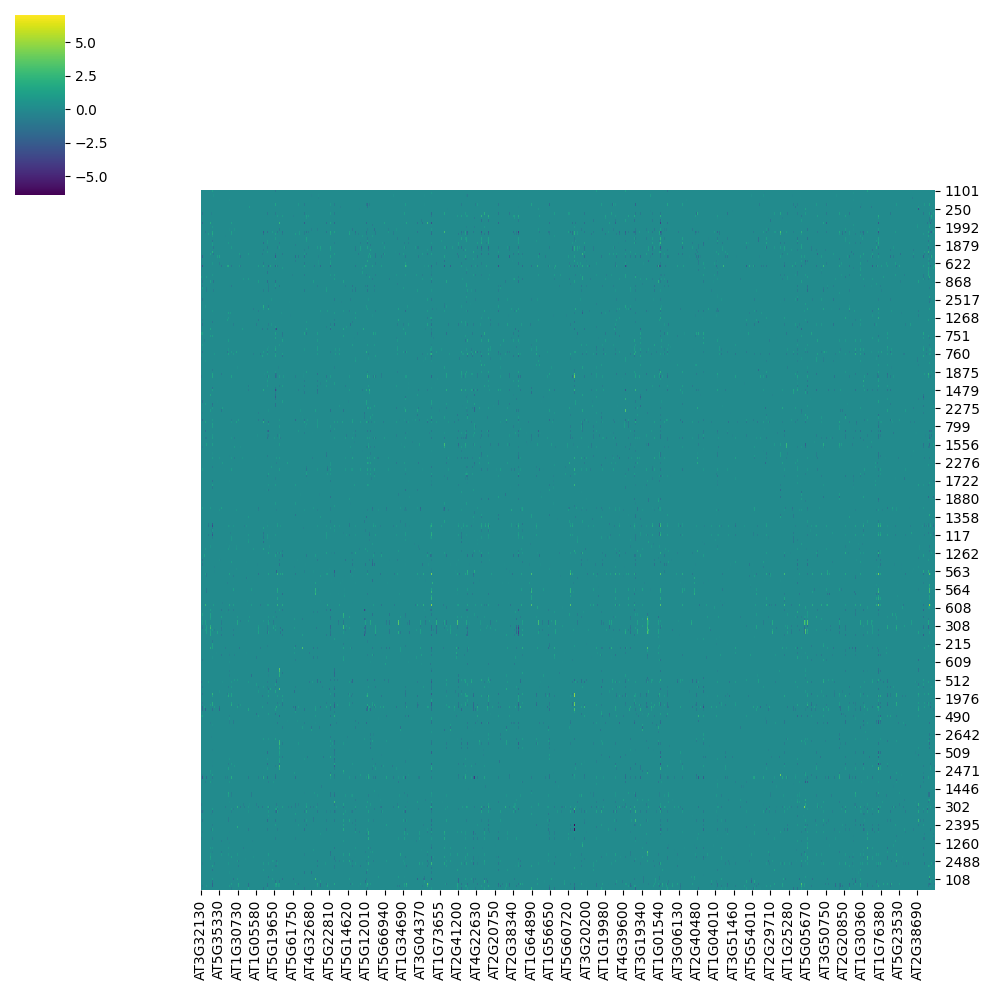

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


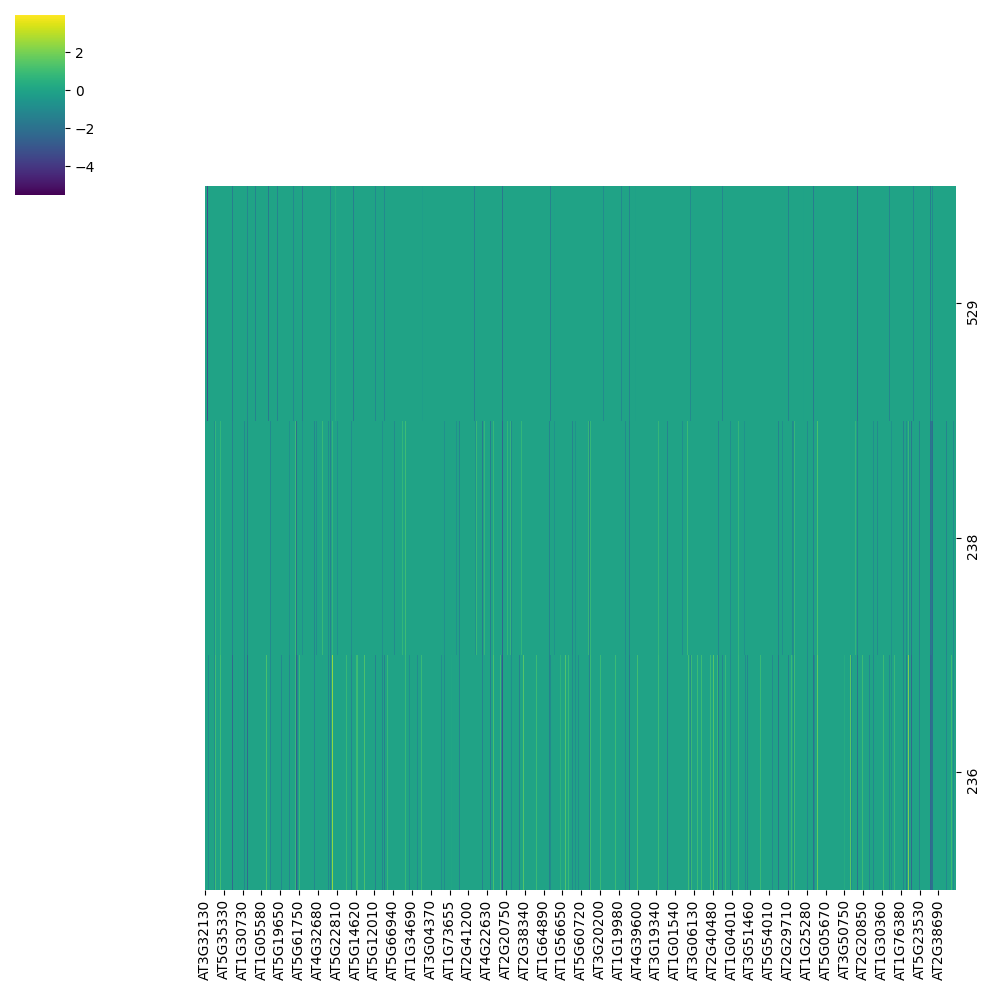

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


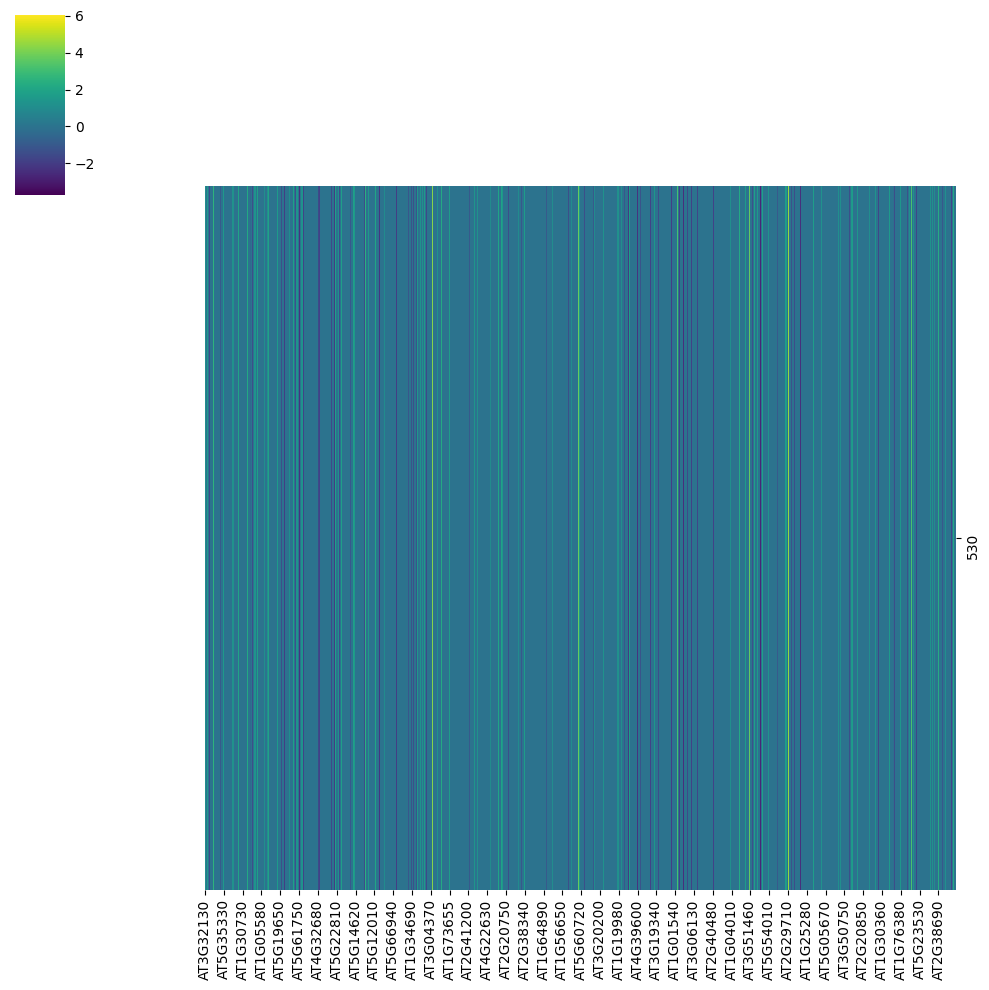

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


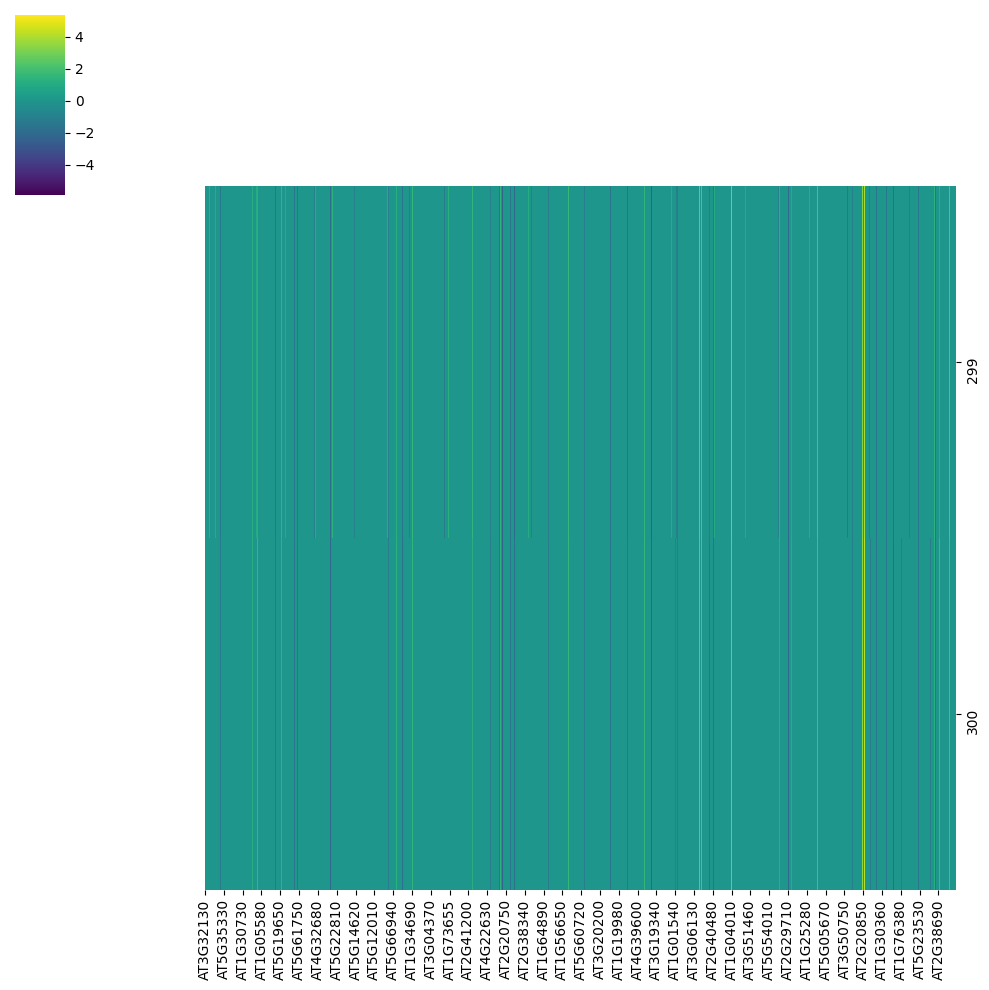

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


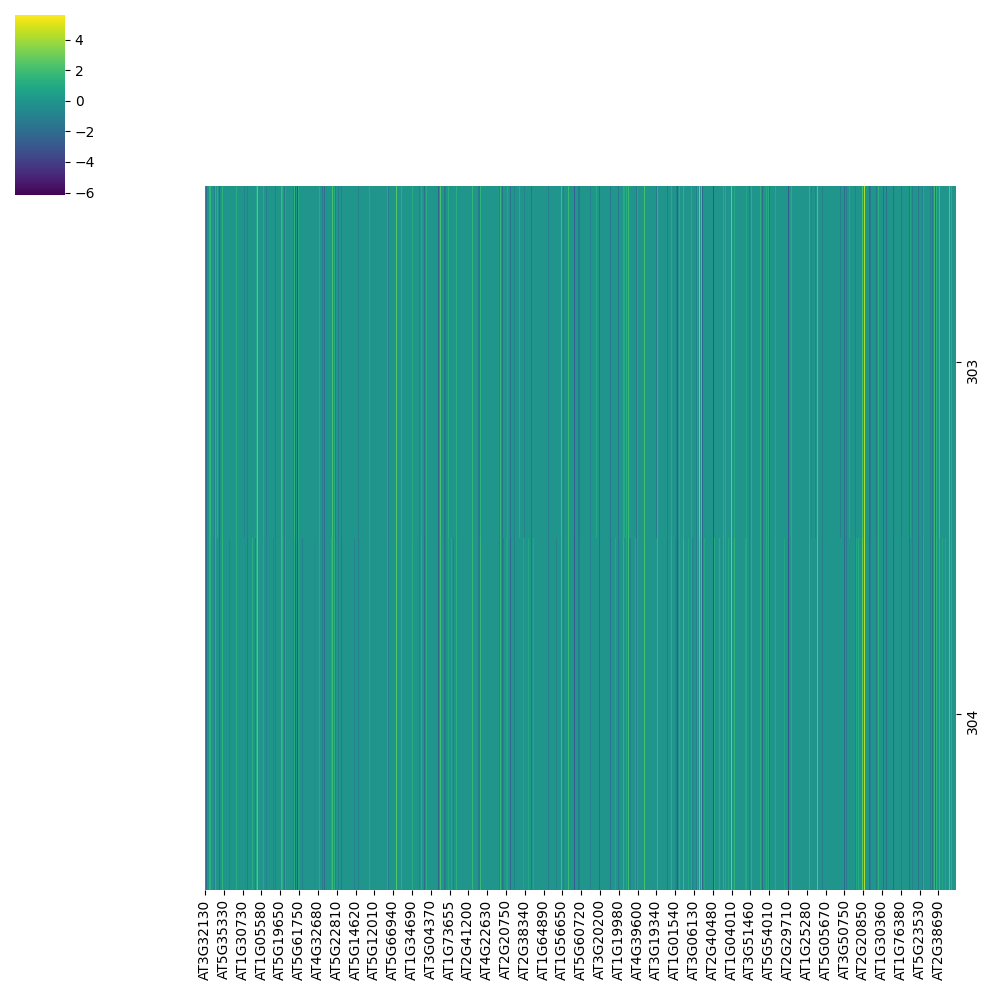

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


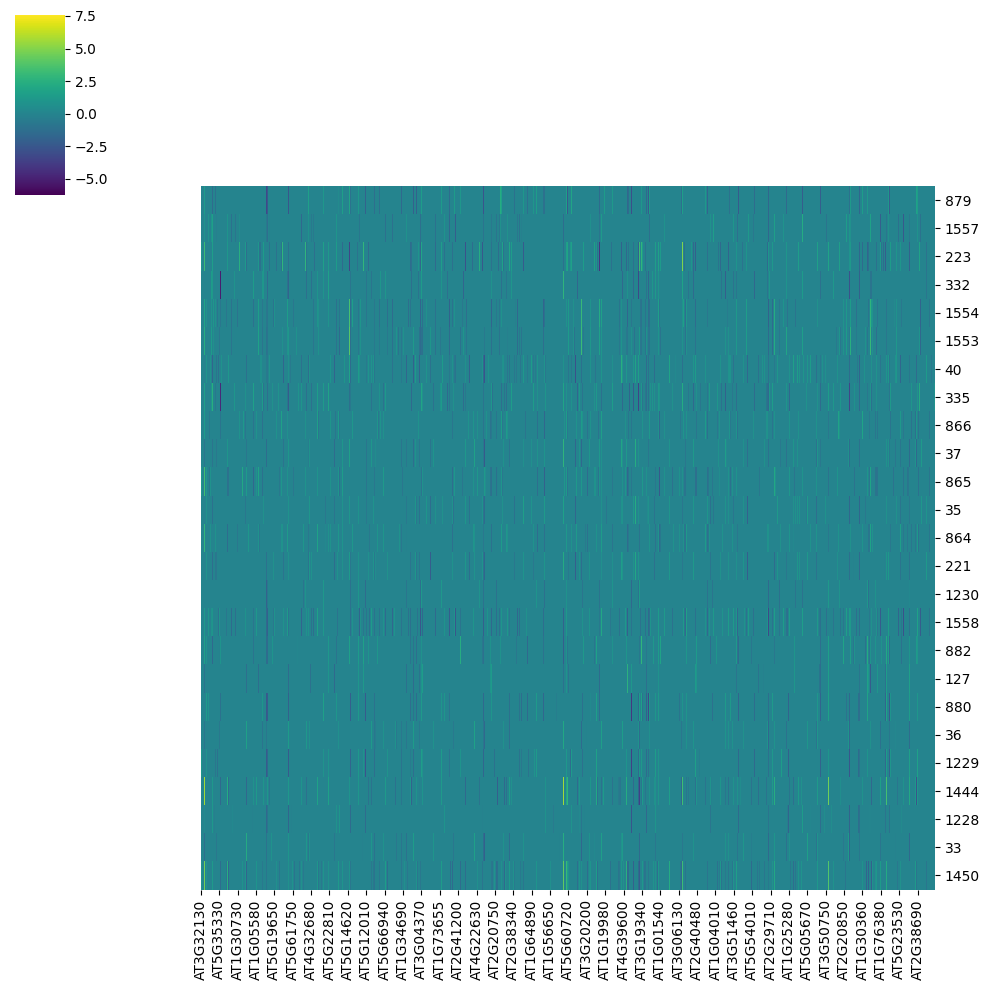

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


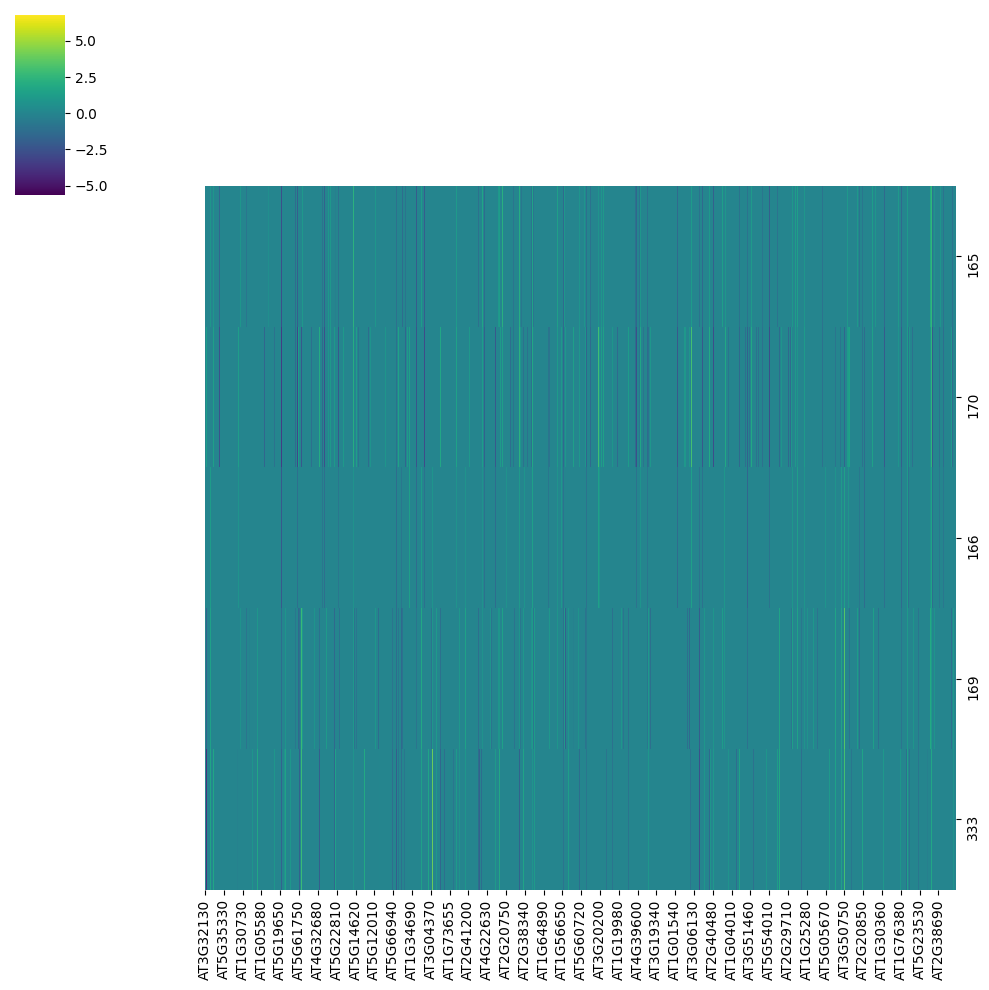

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


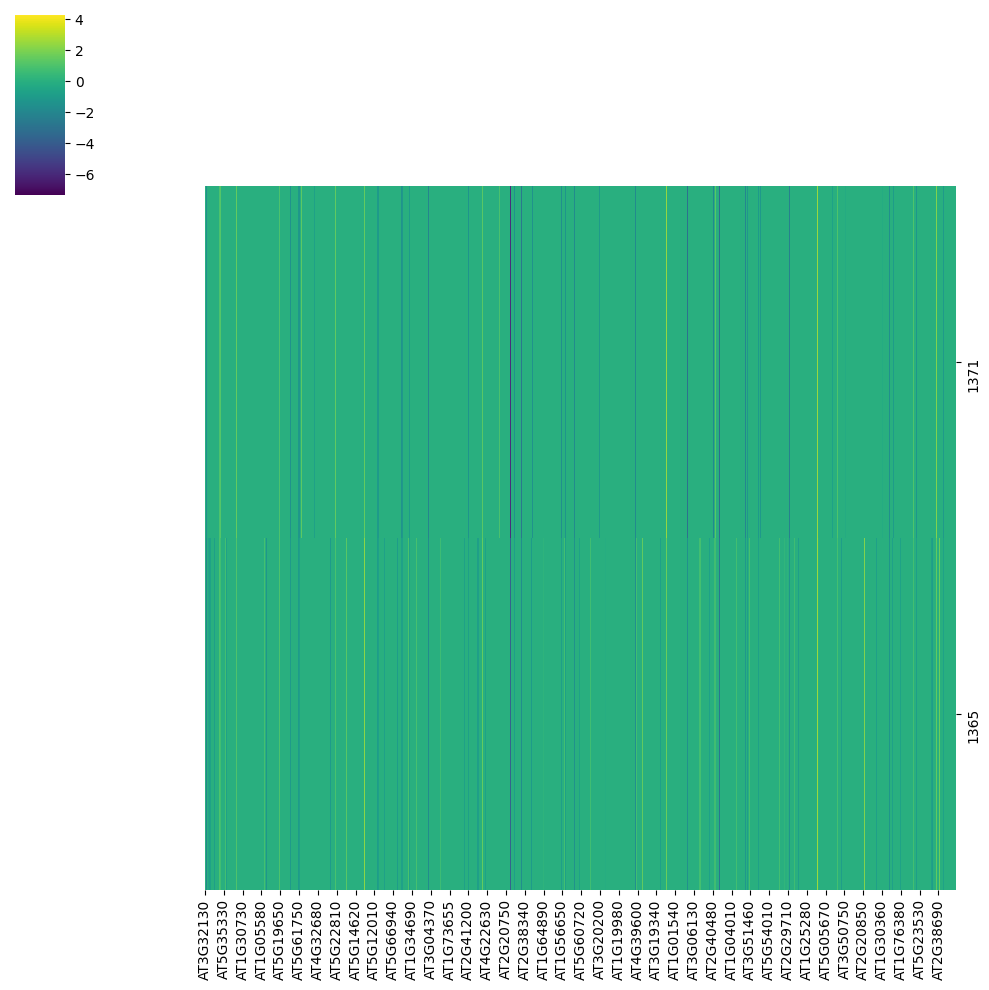

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


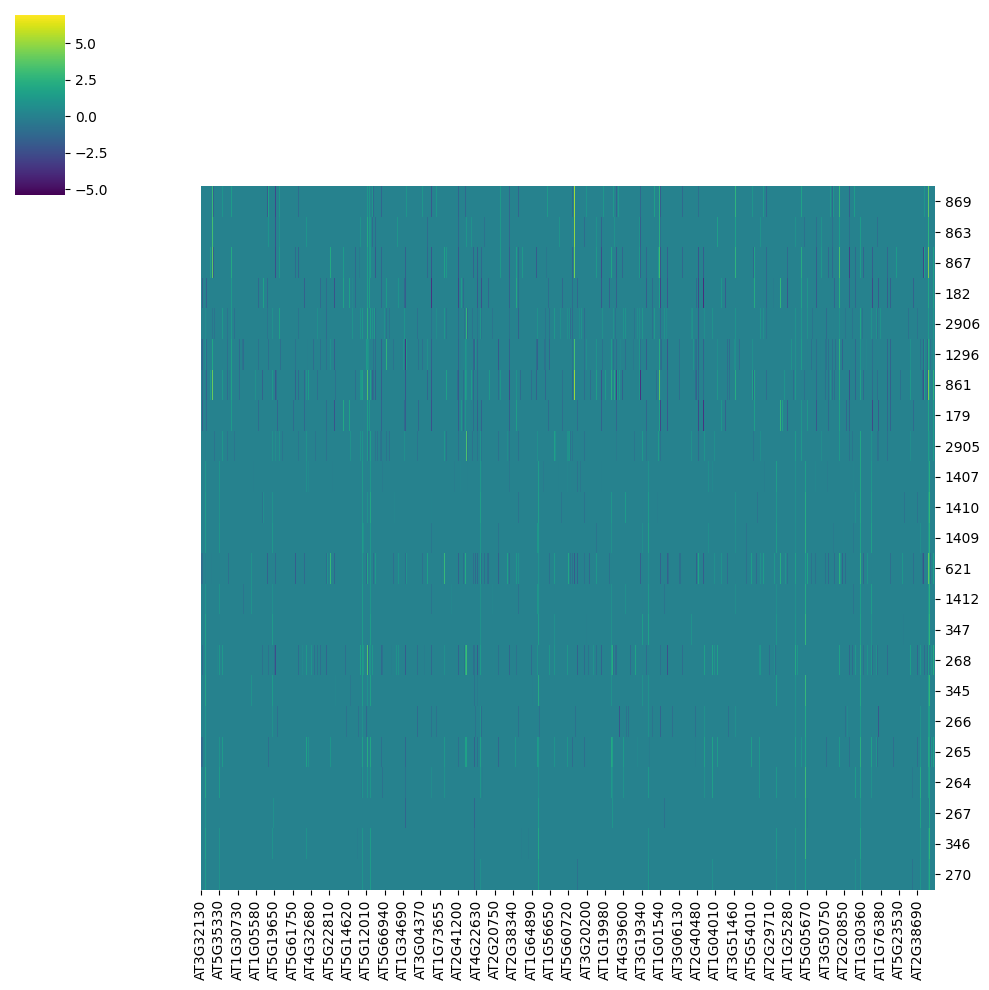

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


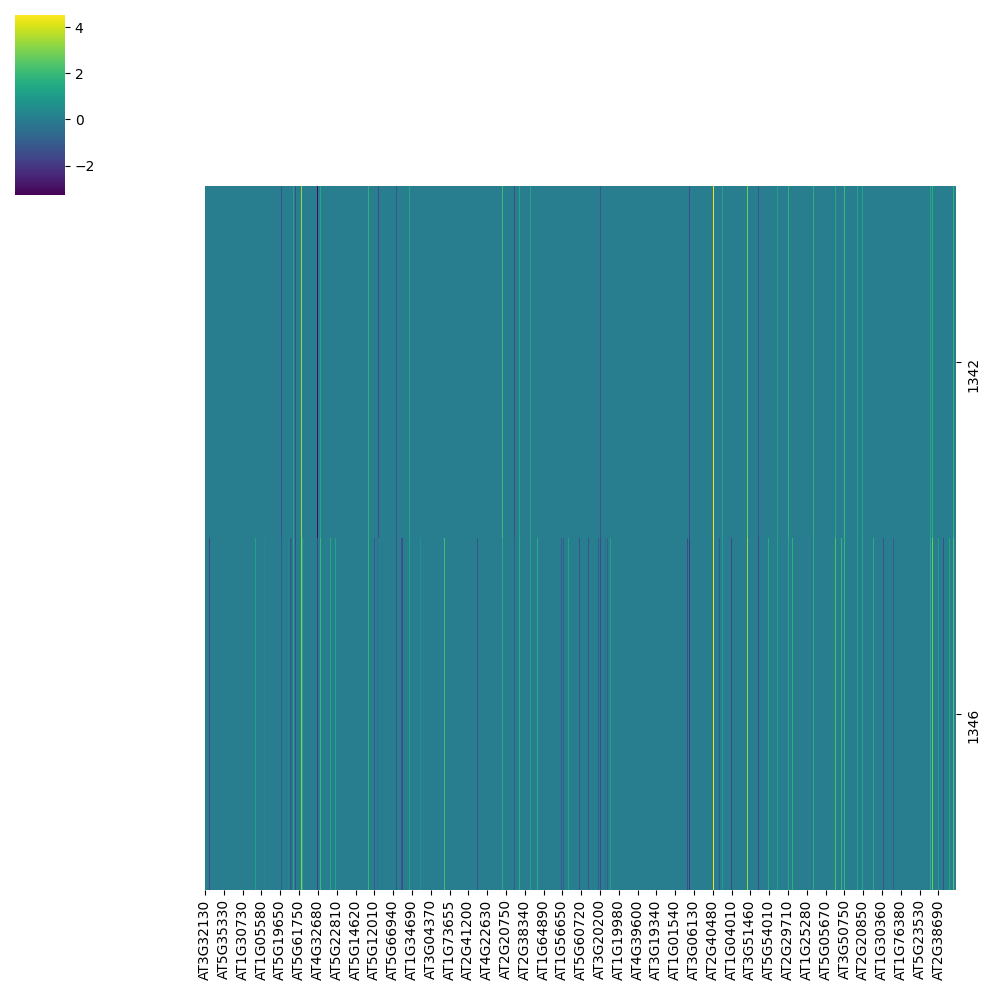

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


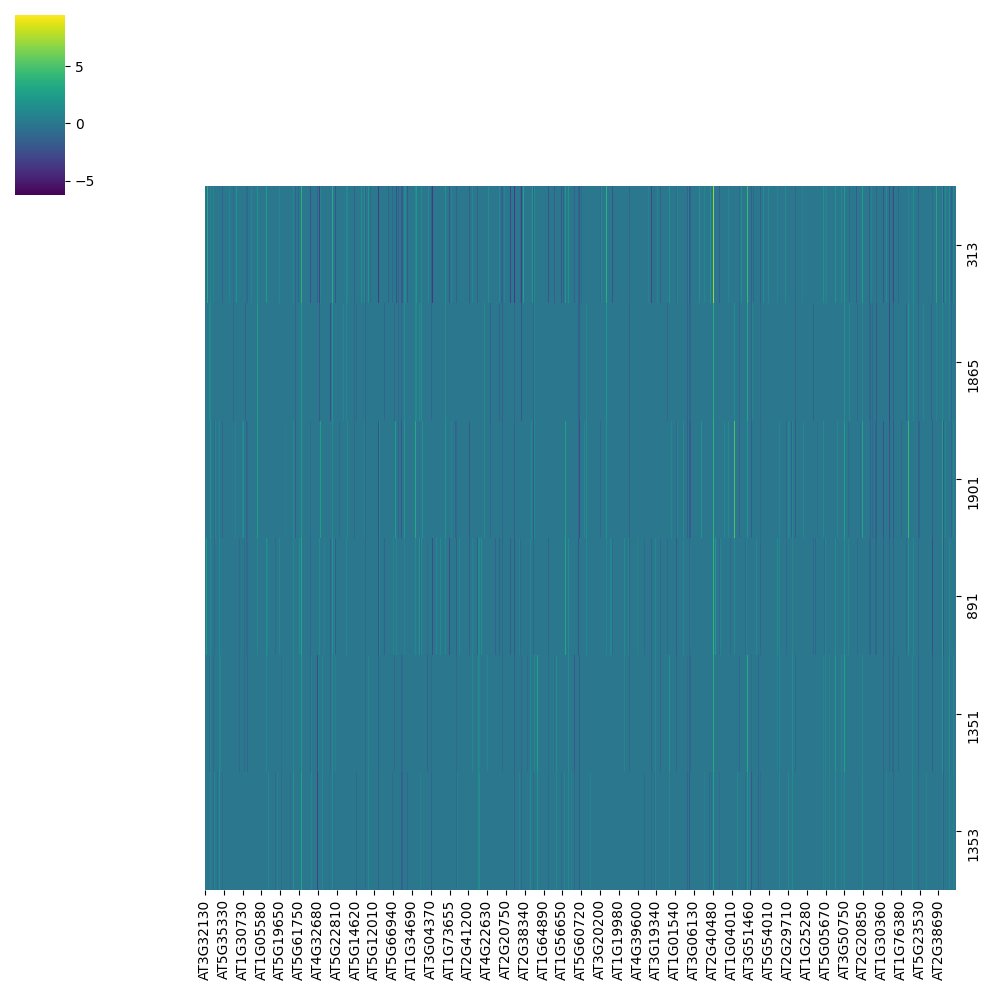

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


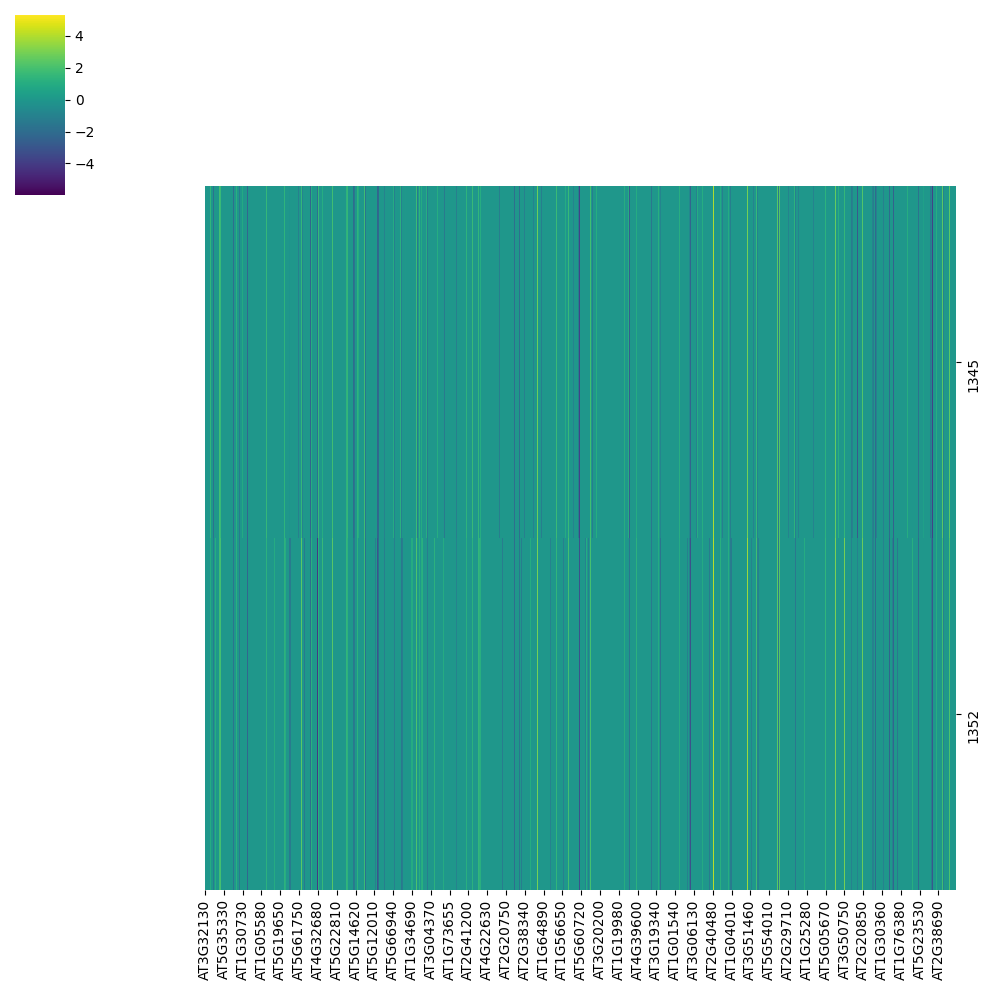

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


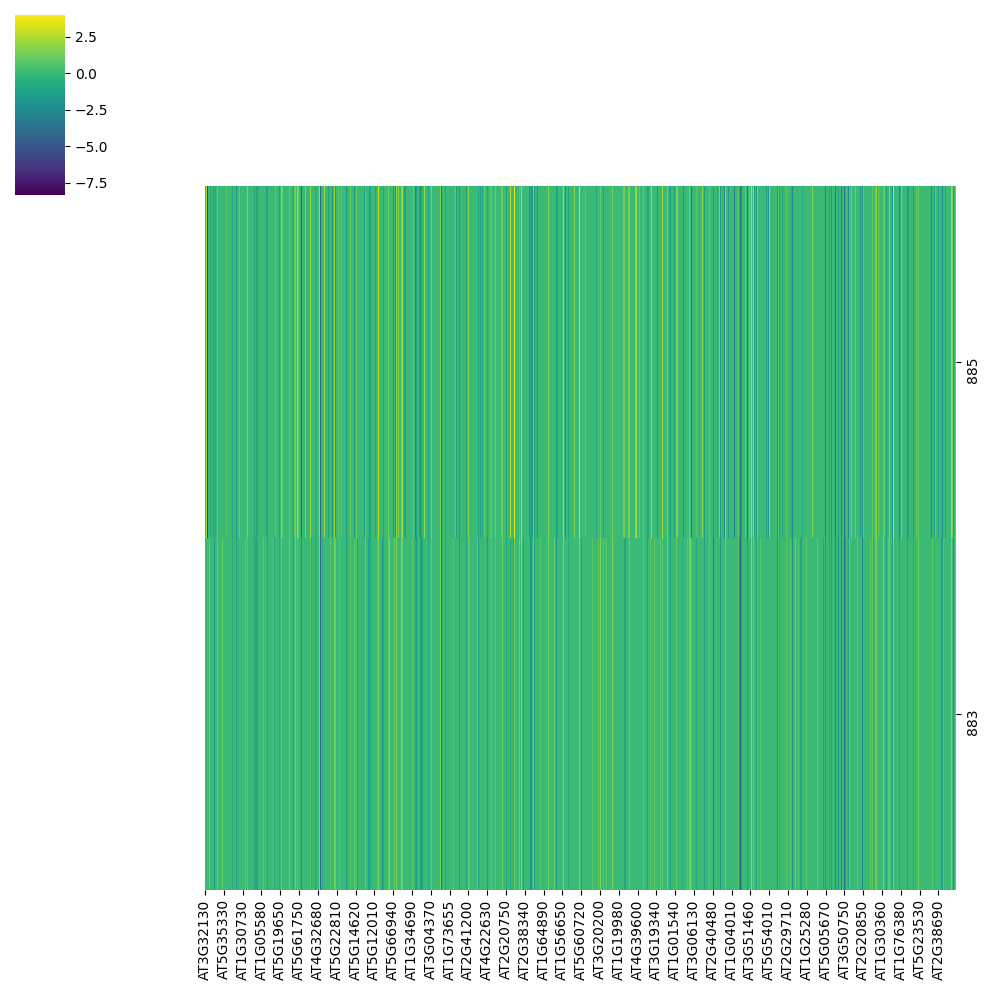

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


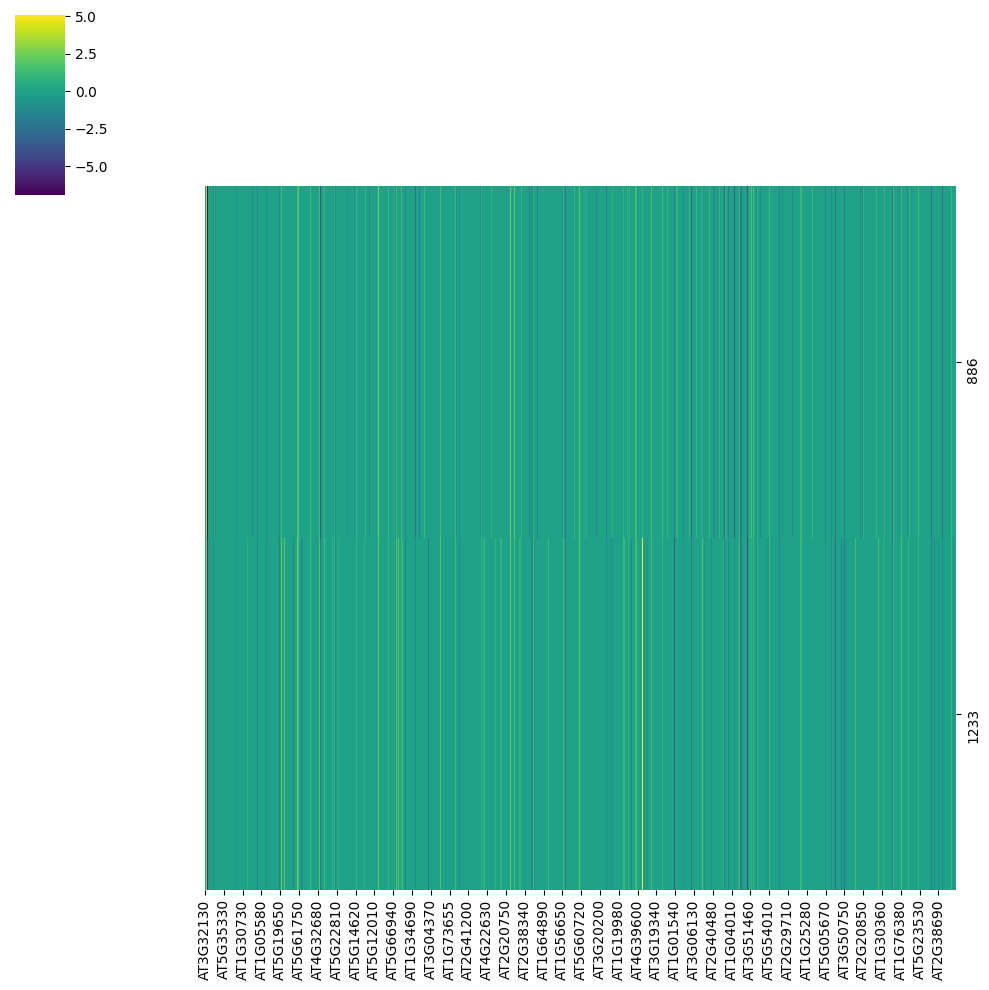

/tmp/ipykernel_541205/2034563247.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'),


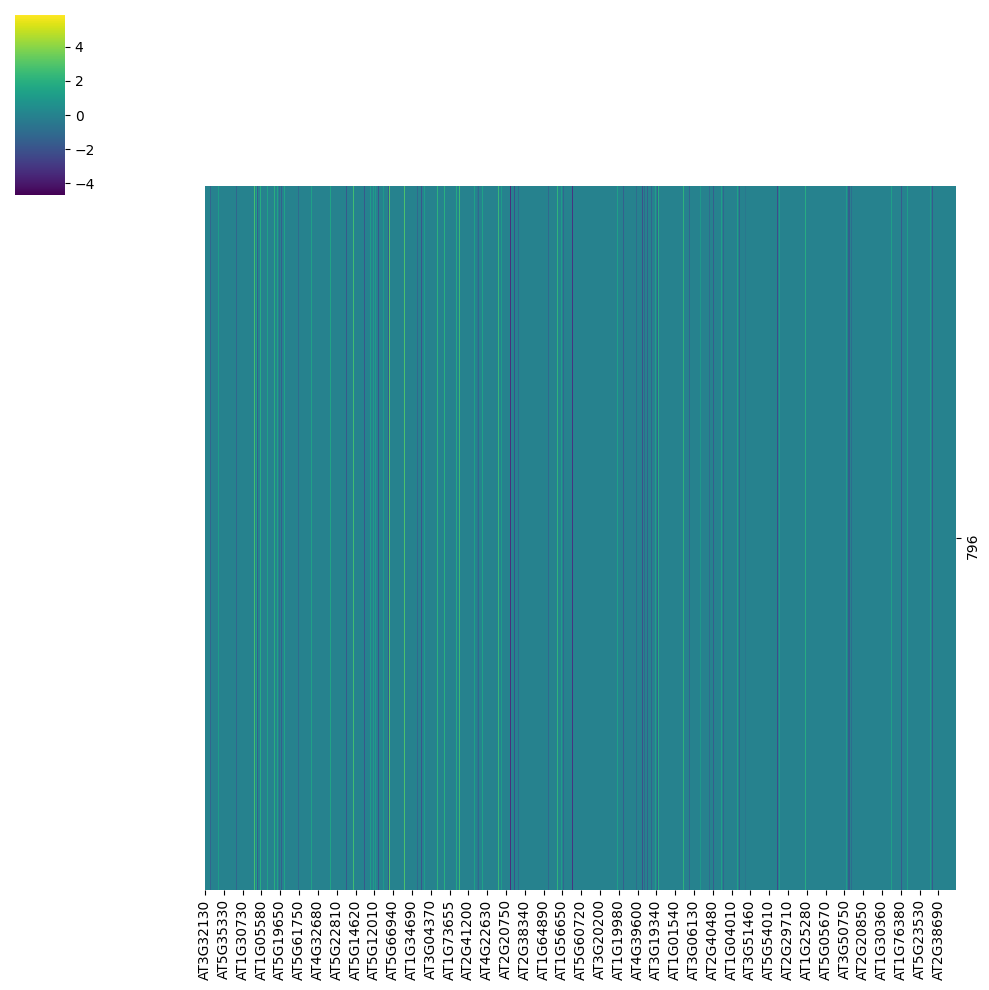

In [33]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 15, random_state = 2).fit(logratio_sig.T)

logratio_labeled = logratio_sig.T.copy()
logratio_labeled['label'] = kmeans.labels_

for cluster in logratio_labeled['label'].unique():
    sns.clustermap(
        logratio_labeled.sort_values('label')[logratio_labeled['label'] == cluster].drop(columns= 'label'), 
        row_cluster=False,  
        col_cluster=False,
        cmap = 'viridis'
    )

    plt.show()

In [19]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Aplicando o DBSCAN
X = logratio_sig.T  # Matriz de dados
dbscan_model = DBSCAN(eps=0.5, min_samples=5).fit(X)

# Obtendo os rótulos
labels = dbscan_model.labels_

# Filtrando pontos que não são ruídos
core_samples_mask = labels != -1
X_core = X[core_samples_mask]
labels_core = labels[core_samples_mask]

# Calculando a Silhouette Score apenas para os clusters
if len(set(labels_core)) > 1:  # Garantir que há mais de um cluster
    silhouette_vals = silhouette_samples(X_core, labels_core)
    silhouette_avg = silhouette_score(X_core, labels_core)
    print(f"Overall Silhouette Score: {silhouette_avg:.3f}")
else:
    print("Não há clusters suficientes para calcular o Silhouette Score.")

# Analisando cada cluster (excluindo ruídos)
unique_clusters = set(labels) - {-1}
for cluster_of_interest in unique_clusters:
    cluster_indices = np.where(labels == cluster_of_interest)[0]
    cluster_silhouette_vals = silhouette_vals[labels_core == cluster_of_interest]

    print(f"Cluster {cluster_of_interest}:")
    print(f"  Number of Points: {len(cluster_silhouette_vals)}")
    print(f"  Average Silhouette Value: {np.mean(cluster_silhouette_vals):.3f}")
    print(f"  Min Silhouette Value: {np.min(cluster_silhouette_vals):.3f}")
    print(f"  Max Silhouette Value: {np.max(cluster_silhouette_vals):.3f}")


Não há clusters suficientes para calcular o Silhouette Score.


In [ ]:

### O kernel não aguenta esse código, infelizmente

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Gaussian Mixture Model
X = logratio_sig.T  # Your data
gmm_model = GaussianMixture(n_components=3, random_state=42).fit(X)  # Adjust n_components as needed
labels = gmm_model.predict(X)

# Calculate Silhouette Scores
silhouette_vals = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)
print(f"Overall Silhouette Score (GMM): {silhouette_avg:.3f}")

# Analyze Each Cluster
unique_clusters = set(labels)
for cluster_of_interest in unique_clusters:
    cluster_indices = np.where(labels == cluster_of_interest)[0]
    cluster_silhouette_vals = silhouette_vals[cluster_indices]

    print(f"Cluster {cluster_of_interest}:")
    print(f"  Number of Points: {len(cluster_silhouette_vals)}")
    print(f"  Average Silhouette Value: {np.mean(cluster_silhouette_vals):.3f}")
    print(f"  Min Silhouette Value: {np.min(cluster_silhouette_vals):.3f}")
    print(f"  Max Silhouette Value: {np.max(cluster_silhouette_vals):.3f}")


: 

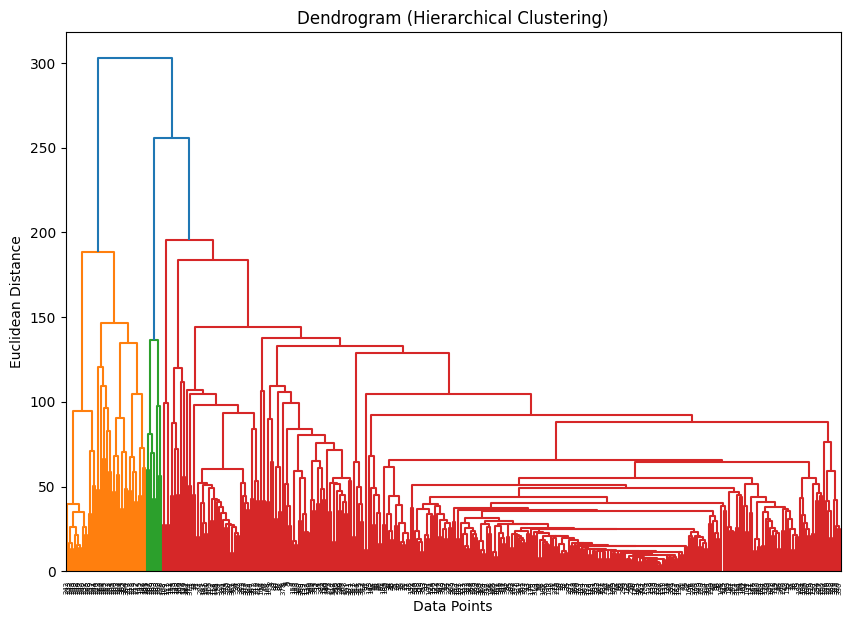

Overall Silhouette Score (Hierarchical): 0.211
Cluster 0:
  Number of Points: 39
  Average Silhouette Value: -0.162
  Min Silhouette Value: -0.282
  Max Silhouette Value: -0.042
Cluster 1:
  Number of Points: 36
  Average Silhouette Value: -0.143
  Min Silhouette Value: -0.290
  Max Silhouette Value: 0.051
Cluster 2:
  Number of Points: 9
  Average Silhouette Value: -0.029
  Min Silhouette Value: -0.147
  Max Silhouette Value: 0.059
Cluster 3:
  Number of Points: 4
  Average Silhouette Value: 0.269
  Min Silhouette Value: 0.109
  Max Silhouette Value: 0.395
Cluster 4:
  Number of Points: 15
  Average Silhouette Value: 0.294
  Min Silhouette Value: 0.150
  Max Silhouette Value: 0.397
Cluster 5:
  Number of Points: 238
  Average Silhouette Value: 0.355
  Min Silhouette Value: 0.095
  Max Silhouette Value: 0.482
Cluster 6:
  Number of Points: 5
  Average Silhouette Value: 0.012
  Min Silhouette Value: -0.296
  Max Silhouette Value: 0.248
Cluster 7:
  Number of Points: 5
  Average Silhouet

In [12]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


X = logratio_sig.T  # Your data

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Agglomerative Clustering
hierarchical_model = AgglomerativeClustering(n_clusters= 20, linkage='ward')  # Adjust n_clusters as needed
labels = hierarchical_model.fit_predict(X)

# Calculate Silhouette Scores
silhouette_vals = silhouette_samples(X, labels)
silhouette_avg = silhouette_score(X, labels)
print(f"Overall Silhouette Score (Hierarchical): {silhouette_avg:.3f}")

# Analyze Each Cluster
unique_clusters = set(labels)
for cluster_of_interest in unique_clusters:
    cluster_indices = np.where(labels == cluster_of_interest)[0]
    cluster_silhouette_vals = silhouette_vals[cluster_indices]

    print(f"Cluster {cluster_of_interest}:")
    print(f"  Number of Points: {len(cluster_silhouette_vals)}")
    print(f"  Average Silhouette Value: {np.mean(cluster_silhouette_vals):.3f}")
    print(f"  Min Silhouette Value: {np.min(cluster_silhouette_vals):.3f}")
    print(f"  Max Silhouette Value: {np.max(cluster_silhouette_vals):.3f}")


In [ ]:
from sklearn.cluster import KMeans

df_log = df_logratio.copy()
df_log = df_log.dropna()
kmeans = KMeans(n_clusters = 15, random_state = 2, n_init = 10).fit(df_log)

In [54]:
df_pval  = bonf_pval.copy()
df_pval  = df_pval.dropna()
df_log_T = df_log.T.loc[:,df_pval.index]

df_log_T = df_log_T.map(lambda x: 1 if x > 0 else -1)

df_pval_T = df_pval.T
df_pval_T = df_pval_T.map(lambda x: 1 if x <= 0.05 else 0)

df_final = df_log_T*df_pval_T

In [63]:
print(len(kmeans.labels_))
print(df_pval.shape)

17219
(4577, 387)


In [59]:
df_pval_T.T.groupby(kmeans.labels_).sum(axis=0)

ValueError: Grouper and axis must be same length

In [35]:
count_values = df_pval_T.sum(axis = 0)

df_pval_T.describe()

,AT5G53730,AT1G07530,AT5G18800,AT2G33270,AT2G31955,AT5G23540,AT5G16550,AT3G61950,AT5G38500,AT1G50740,...,AT5G42340,AT2G24990,AT5G53440,AT3G46340,AT2G25660,AT5G11240,AT3G33530,AT2G40790,AT1G04440,AT3G33009
count,387.000000,387.000000,387.000000,387.0,387.000000,387.000000,387.000000,387.0,387.000000,387.000000,...,387.0,387.0,387.000000,387.0,387.000000,387.000000,387.000000,387.0,387.000000,387.000000
mean,0.149871,0.067183,0.062016,0.0,0.062016,0.103359,0.025840,0.0,0.002584,0.183463,...,0.0,0.0,0.036176,0.0,0.012920,0.080103,0.020672,0.0,0.023256,0.005168
std,0.357407,0.250664,0.241496,0.0,0.241496,0.304822,0.158863,0.0,0.050833,0.387546,...,0.0,0.0,0.186969,0.0,0.113075,0.271805,0.142467,0.0,0.150910,0.071795
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [9]:
count_values = genes_matrix.sum(axis = 1)
count_values

AT5G09440    53
AT3G29320    49
AT5G59570    48
AT3G55830    48
AT3G16140    47
             ..
AT2G03670     3
AT3G12530     3
AT5G40780     3
AT1G56280     2
AT2G03620     2
Length: 13854, dtype: int64